In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
!gdown --id 1NXJJNpL5psy-vPzJHIYl4WaeIbky66sR

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NXJJNpL5psy-vPzJHIYl4WaeIbky66sR
To: /content/diabetes.csv
100% 23.1k/23.1k [00:00<00:00, 90.2MB/s]


In [10]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


0    500
1    268
Name: Outcome, dtype: int64


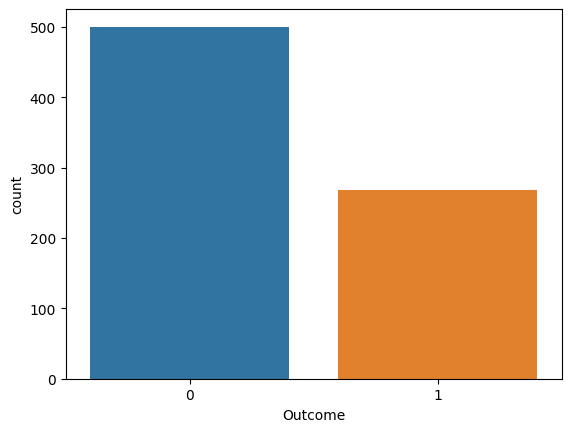

In [13]:
print(df["Outcome"].value_counts())

sns.countplot(x="Outcome", data=df)
plt.show()

In [14]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

In [15]:
X_scaled = StandardScaler().fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)
     

In [16]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [17]:
knn_model = KNeighborsClassifier().fit(X, y)
random_user = X.sample(1, random_state=45)  #aynı kullanıcı bilgilerine ulaşmak için 45 girilmiştir.
random_user

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
195,0.342981,1.161295,0.770014,1.283638,1.130518,0.940144,-0.232176,-0.360847


In [18]:
knn_model.predict(random_user)

array([1])

In [19]:
y_pred = knn_model.predict(X)

In [20]:
y_prob = knn_model.predict_proba(X)[:, 1]

In [21]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       500
           1       0.79      0.70      0.74       268

    accuracy                           0.83       768
   macro avg       0.82      0.80      0.81       768
weighted avg       0.83      0.83      0.83       768



In [22]:
roc_auc_score(y, y_prob)

0.9017686567164179

In [23]:
cv_results = cross_validate(knn_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
cv_results

{'fit_time': array([0.00330687, 0.00259185, 0.00264907, 0.0031085 , 0.00264192]),
 'score_time': array([0.02103472, 0.02041936, 0.01878405, 0.02069235, 0.01363015]),
 'test_accuracy': array([0.72077922, 0.73376623, 0.71428571, 0.77124183, 0.7254902 ]),
 'test_f1': array([0.58252427, 0.60952381, 0.54166667, 0.63917526, 0.58      ]),
 'test_roc_auc': array([0.77555556, 0.78759259, 0.73194444, 0.83226415, 0.77528302])}

In [ ]:
cv_results['test_accuracy'].mean()

0.733112638994992

In [ ]:
cv_results['test_f1'].mean()

0.5905780011534191

In [ ]:
cv_results['test_roc_auc'].mean()

0.7805279524807827

In [ ]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
knn_params = {"n_neighbors": range(2, 50)}

knn_gs_best = GridSearchCV(knn_model,
                           knn_params,
                           cv=5,
                           n_jobs=-1,  
                           verbose=1).fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
knn_gs_best.best_params_

{'n_neighbors': 17}

In [ ]:
knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X, y)
cv_results = cross_validate(knn_final,
                            X,
                            y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])
     

In [ ]:
cv_results['test_accuracy'].mean()

0.7669892199303965

In [ ]:
cv_results['test_f1'].mean()

0.6170909049720137

In [ ]:
cv_results['test_roc_auc'].mean()

0.8127938504542278

In [ ]:
random_user = X.sample(1)
random_user

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
658,2.12478,0.191084,1.907364,-1.288212,-0.692891,0.889377,-0.8513,1.511083


In [ ]:
knn_final.predict(random_user)

array([1])